# Pymaceuticals Inc.
---

### Analysis

--Data of 249 mice identified with SCC tumors was analysed. Mice received treatment with a range of drug regimens over period of 45 days and tumor development was observed and measured.
Following observations were made:

1)The bar chart showing range of drugs, shows Drug Capomulin(230) and Ramicane(228) has highest number of mice for 
  the study, while Drug Propriva(148) has lowest number of mice for the study.
  
2)The pie chart shows the male and female distribution of mice in this study with male being 51% slightly higher
  than female being 49%.
  
3)The box plot shows distribution of final tumor volume for drugs Capomulin,Ramicane,Infubinol,Ceftamin.
- Median,box length and length of whiskers for Capomulin and Ramicane falls within lower half of final tumor
  volume(between 20 and 50 mm3) with no potential outliers.
- While for Infubinol its Median,box length and length of whiskers falls within the upper half of final tumor 
  volume(between 45 and 70 mm3) with one potential outlier at 36.3 tumor volume.
- For Ceftamin its Median,box length and length of whiskers falls within the upper half of final tumor 
  volume(between 45 and 70 mm3) with no potential outlier. Its boxlength is longer than the other three drugs,
  showing highest variability in data.
- As Capomulin and Ramicane shows lower final tumor volume with no potential outliers, these drugs should be
  considered for tumor treatment study. -Infubinol and Ceftamin shows higher final tumor volume (with 1 potential   
  outlier for Infubinol), these drugs should not be considered for tumor treatment study.
  
4)Line plot of a single mouse(l509)treated with Capomulin shows that from period of 0 to 45 days of treatment, the   final tumor volume has decreased from 45mm3 to 41.5mm3. There were some fluctuations with spike in tumor volume
  at day 20 and day 30, but sharp decrease was noted at day 35. From this we can conclude Capomulin treatment is
  effective in decreasing tumor volume in mousel509.
  
5)Scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen shows a
  positive correlation, means as the mouse weight increases, the tumor volume also increases.
  
6)A linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen shows a positive linear correlation with calulated correlation coefficient of 0.84. This means the mouse weight increases with increase in tumor volume. Our values with Capomulin drug shows decrease in the tumor volume with decrease in weight of mouse,indicating a successful outcome.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_data = combined_data.groupby(['Mouse ID', 'Timepoint'])

# Initialize an empty list to store duplicate Mouse IDs
duplicate_mice_list = []

# Iterate through groups
for group_ID, group_time in grouped_data:
    if len(group_time) > 1:
        duplicate_mice_list.append(group_ID[0])
    
print(duplicate_mice_list)


['g989', 'g989', 'g989', 'g989', 'g989']


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_combined_data = combined_data.set_index('Mouse ID')
clean_data = index_combined_data.drop(['g989'])
clean_data1 = clean_data.reset_index()
clean_data1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean =len(clean_data1["Mouse ID"].unique())
num_mice_clean

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_data1.groupby("Drug Regimen")["Tumor Volume (mm3)"]
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': grouped_data.mean(),
    'Median Tumor Volume': grouped_data.median(),
    'Tumor Volume Variance': grouped_data.var(),
    'Tumor Volume Std. Dev.': grouped_data.std(),
    'Tumor Volume Std. Err.': grouped_data.sem()
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_new = clean_data1.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_new

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

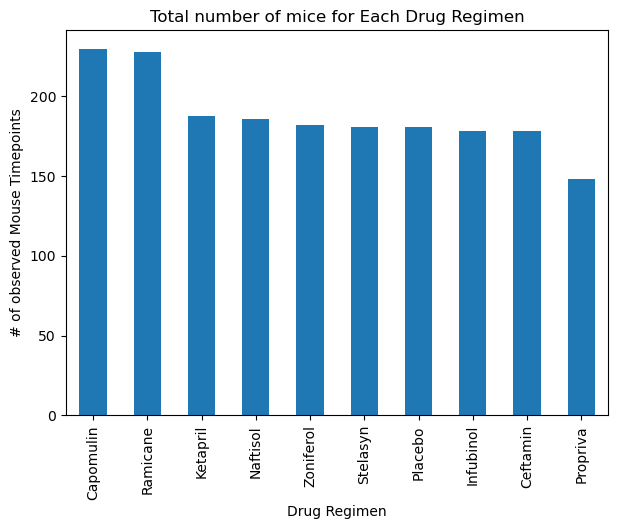

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = clean_data1["Drug Regimen"].value_counts()
bar_plot = drug_data.plot(kind='bar',figsize=(7,5))
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of observed Mouse Timepoints")
bar_plot.set_title("Total number of mice for Each Drug Regimen")
plt.show()

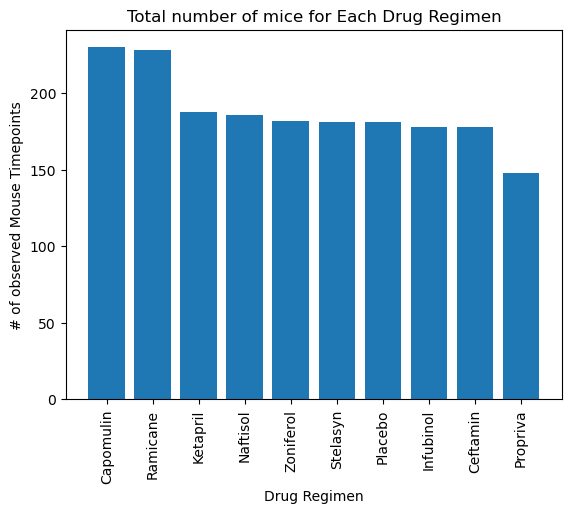

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_data1["Drug Regimen"].value_counts()
plt.bar(x_axis.index,x_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.title("Total number of mice for Each Drug Regimen")
plt.xticks(rotation=90,ha='center')
plt.show()


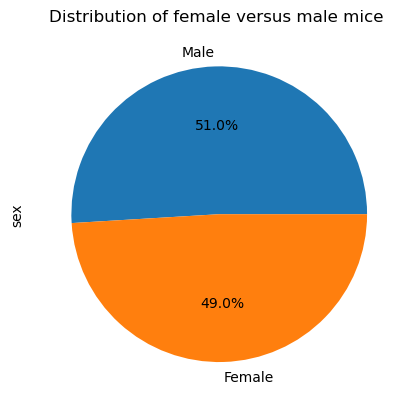

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_data1["Sex"].value_counts()
pie_plot = pie_data.plot(kind='pie',autopct="%1.1f%%")
pie_plot.set_ylabel("sex")
pie_plot.set_title("Distribution of female versus male mice ")
plt.show()

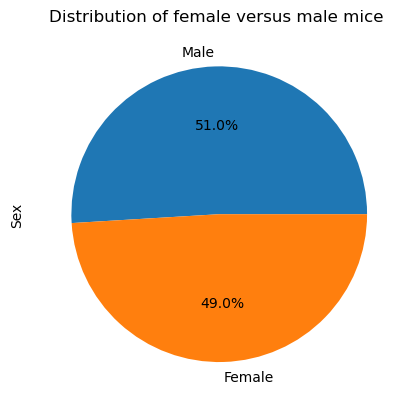

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_data = clean_data1["Sex"].value_counts()
labels = mice_data.index
plt.pie(mice_data,labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex", rotation='vertical') 
plt.title("Distribution of female versus male mice ")
plt.show()


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data1.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data1, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

capom = []
rami  = []
infub = []
ceft  = []

# Define dictionaries to store lower bound, upper bound, interquartile range, and outliers for each treatment
lower_bounds = {}
upper_bounds = {}
iqr_values = {}
outliers_dict = {}

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate quartiles
    quartiles = final_tumor_volume.quantile([0.25, 0.75])
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = quartiles[0.75] - quartiles[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - 1.5 * iqr
    upper_bound = quartiles[0.75] + 1.5 * iqr
    
    outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    # Store the lower and upper bounds, IQR, and outliers in the dictionaries
    lower_bounds[treatment] = lower_bound
    upper_bounds[treatment] = upper_bound
    iqr_values[treatment] = iqr
    outliers_dict[treatment] = outliers
    
    # Append the tumor volume data to the corresponding list
    if treatment == 'Capomulin':
        capom.append(final_tumor_volume)
    elif treatment == 'Ramicane':
        rami.append(final_tumor_volume)
    elif treatment == 'Infubinol':
        infub.append(final_tumor_volume)
    elif treatment == 'Ceftamin':
        ceft.append(final_tumor_volume)

# Print the lower bound, upper bound,and IQR for each treatment
for treatment in treatments:
    print(f"{treatment} - Lower bound: {lower_bounds[treatment]}, Upper bound: {upper_bounds[treatment]}, IQR: {iqr_values[treatment]}")
    print("------------------------------------------------------------------------------------------------------")
       
# Print the outliers for each treatment
for treatment in treatments:    
    print(f"{treatment} - Outliers: {outliers_dict[treatment]}")
  
    

Capomulin - Lower bound: 20.70456164999999, Upper bound: 51.83201549, IQR: 7.781863460000004
------------------------------------------------------------------------------------------------------
Ramicane - Lower bound: 17.912664470000003, Upper bound: 54.30681135, IQR: 9.098536719999998
------------------------------------------------------------------------------------------------------
Infubinol - Lower bound: 36.83290494999999, Upper bound: 82.74144559000001, IQR: 11.477135160000003
------------------------------------------------------------------------------------------------------
Ceftamin - Lower bound: 25.355449580000002, Upper bound: 87.66645829999999, IQR: 15.577752179999997
------------------------------------------------------------------------------------------------------
Capomulin - Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane - Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol - Outliers: 31    36.321346
Name: Tumor Vol

In [71]:
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments:
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
tumor_volume_data  

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

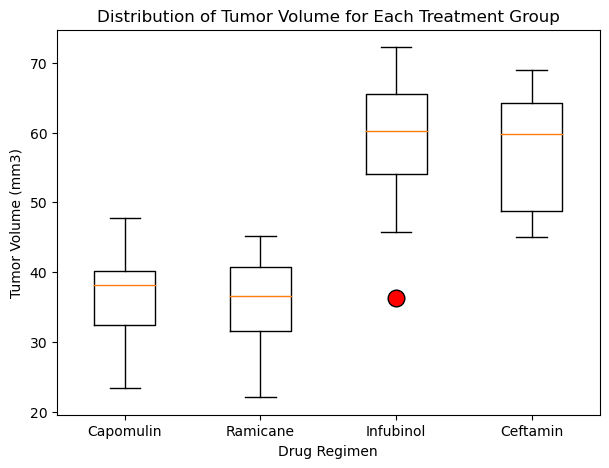

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(7,5))
flierprops = dict(markerfacecolor='red', marker='o', markersize=12)
plt.boxplot(tumor_volume_data, labels=treatments,flierprops=flierprops)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

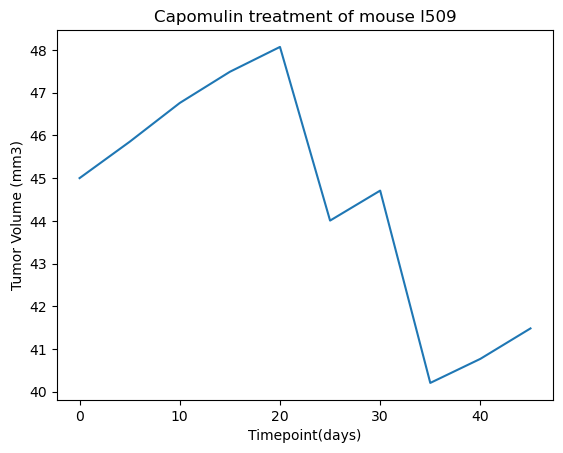

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_data1[clean_data1["Mouse ID"] == "l509"]
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



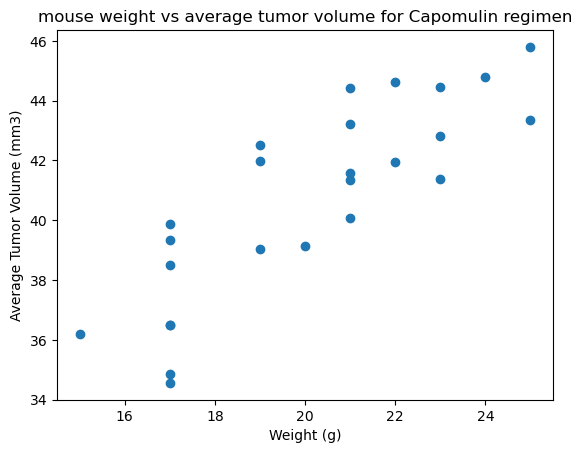

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data1[clean_data1["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.title('mouse weight vs average tumor volume for Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [75]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation between weight and the average tumor volume is: {correlation}")

The correlation between weight and the average tumor volume is: PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712388e-07)


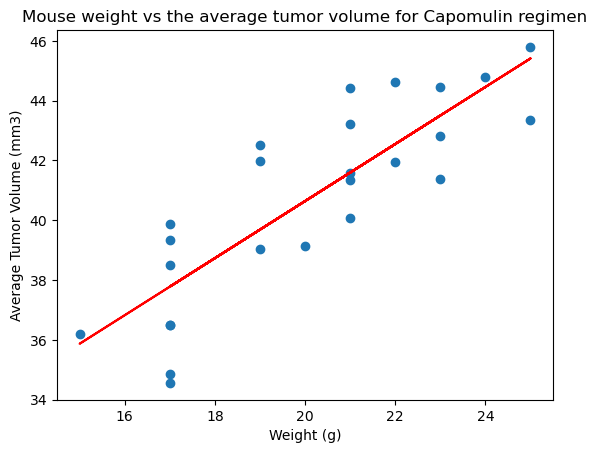

In [55]:
# Calculate a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mouse_weight, average_tumor_volume)
pe_fit = pe_slope * mouse_weight + pe_int

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight,pe_fit,"-",color='red')
plt.title('Mouse weight vs the average tumor volume for Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
